# Gamestop

In [386]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import numpy as np
import matplotlib.ticker as tick

In [387]:
# url = 'https://cloud.iexapis.com/stable/stock/GME/financials/5?token=sk_a6ef19bab2c5459093f4aaac416b6219&period=annual'
url = 'https://cloud.iexapis.com/stable/stock/GME/'
token = 'sk_a6ef19bab2c5459093f4aaac416b6219'
query_url = url + 'financials/5?token=' + token + '&period=annual'
print(requests.get(query_url))

<Response [200]>


## GameStop Financials

In [388]:
response = requests.get(query_url)
gme = response.json()

In [389]:
financials = gme['financials']
financials_df = pd.DataFrame(financials, columns=['date','EBITDA','totalCash','totalDebt', 'grossProfit',
                                                  'cashFlow','commonStock', 'totalAssets', 
                                                 'totalInvestingCashFlows', 'totalLiabilities','totalRevenue'])

financials_df['date'] = pd.to_datetime(financials_df['date'], unit='ms')

financials_df = financials_df.rename(columns={'date': 'Date',
                                              'totalCash': 'Total Cash',
                                              'totalDebt': 'Total Debt',
                                              'totalRevenue':'Total Revenue',
                                              'grossProfit': 'Gross Profit',
                                              'cashFlow': 'Cash Flow',
                                              'commonStock': 'Common Stock',
                                              'totalAssets': 'Total Assets',
                                              'totalInvestingCashFlows': 'Total Investment Cash Flow',
                                              'totalLiabilities': 'Total Liabilities',
                                              }).set_index('Date')

financials_df.style.format({
    'EBITDA': "${:,.2f}",
    'Total Cash': "${:,.2f}",
    'Total Debt': "${:,.2f}",
    'Total Revenue': "${:,.2f}",
    'Gross Profit': "${:,.2f}",
    'Cash Flow': "${:,.2f}",
    'Common Stock': "${:,.2f}",
    'Total Assets': "${:,.2f}",
    'Total Investment Cash Flow': "${:,.2f}",
    'Total Liabilities': "${:,.2f}"})

In [390]:
pd.DataFrame(financials)

EBITDA  accountsPayable capitalSurplus  cashChange   cashFlow  \
0   82200000        380800000           None -1125000000  414500000   
1  419500000       1051900000           None   760000000  325100000   
2  677100000        902000000           None   195000000  434900000   
3  756700000        616600000           None   219000000  537100000   
4  809400000        631900000           None  -159700000  656800000   

   cashFlowFinancing  changesInInventories  changesInReceivables  commonStock  \
0         -644700000            -390800000               7700000     87500000   
1         -174700000            -116200000             -48500000    102100000   
2         -202500000             245200000             -38200000    101400000   
3          238700000             -41500000              44400000    103400000   
4         -346200000              18200000              63000000    106000000   

   costOfRevenue  ...  totalDebt  totalInvestingCashFlows  totalLiabilities  \
0     4557300000  ...  419800000                -60900000        2208200000   
1     5977200000  ...  820800000                635500000        2708100000   
2     6184500000  ...  817900000                -63700000        2827100000   
3     5598600000  ...  815000000               -578000000        2721800000   
4     6445500000  ...  350400000               -444600000        2253900000   

   totalRevenue  treasuryStock          id  key  subkey           date  \
0    6466000000              0  FINANCIALS  GME  annual  1580515200000   
1    8285300000              0  FINANCIALS  GME  annual  1549065600000   
2    9224600000              0  FINANCIALS  GME  annual  1517616000000   
3    8607900000              0  FINANCIALS  GME  annual  1485561600000   
4    9363800000              0  FINANCIALS  GME  annual  1454112000000   

         updated  
0  1611947314000  
1  1611947314000  
2  1611947314000  
3  1611947314000  
4  1611947315000  

[5 rows x 70 columns]

In [391]:
#Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).

def reformat_large_tick_values(tick_val, pos):

    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

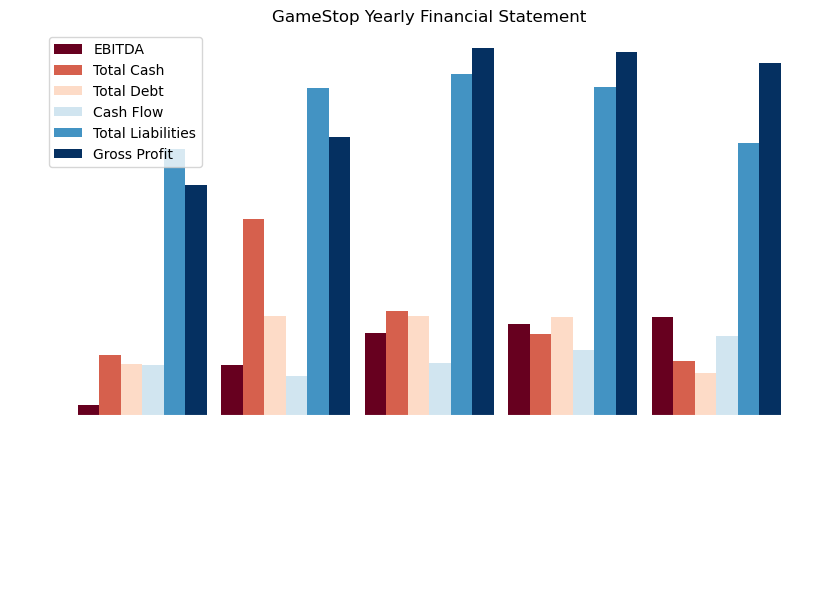

In [421]:

columns = financials_df[['EBITDA','Total Cash','Total Debt','Cash Flow', 'Total Liabilities','Gross Profit']]

ax = columns.plot.bar(figsize=(10,5), colormap="RdBu", title="GameStop Yearly Financial Statement",
                width=.9)

ax.legend(loc=2)  
# plt.ylabel('size in meters')
# plt.xlabel('time in seconds')
plt.show()

In [407]:
columns

EBITDA  Total Cash  Total Debt  Cash Flow  Total Liabilities  \
Date                                                                          
2020-02-01   82200000   499400000   419800000  414500000         2208200000   
2019-02-02  419500000  1624400000   820800000  325100000         2708100000   
2018-02-03  677100000   864400000   817900000  434900000         2827100000   
2017-01-28  756700000   669400000   815000000  537100000         2721800000   
2016-01-30  809400000   450400000   350400000  656800000         2253900000   

            Gross Profit  
Date                      
2020-02-01    1908700000  
2019-02-02    2308100000  
2018-02-03    3040100000  
2017-01-28    3009300000  
2016-01-30    2918300000

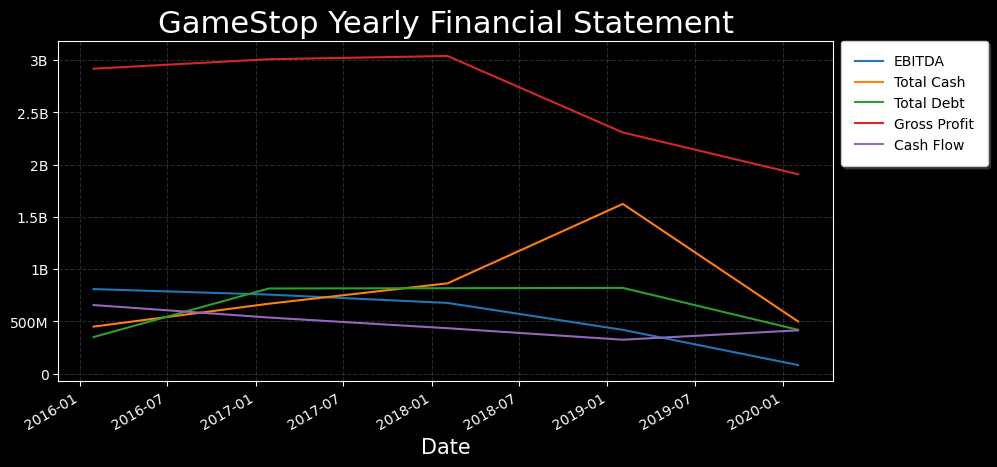

In [282]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='black')

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)


financials_df['EBITDA'].plot()
financials_df['Total Cash'].plot()
financials_df['Total Debt'].plot()
financials_df['Gross Profit'].plot()
financials_df['Cash Flow'].plot()


ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,
          fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_facecolor('black')


plt.title("GameStop Yearly Financial Statement", fontsize=22, color='white')
plt.grid(color='lightslategrey', linestyle='--', alpha=0.3)
plt.xlabel('Date', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Date'>

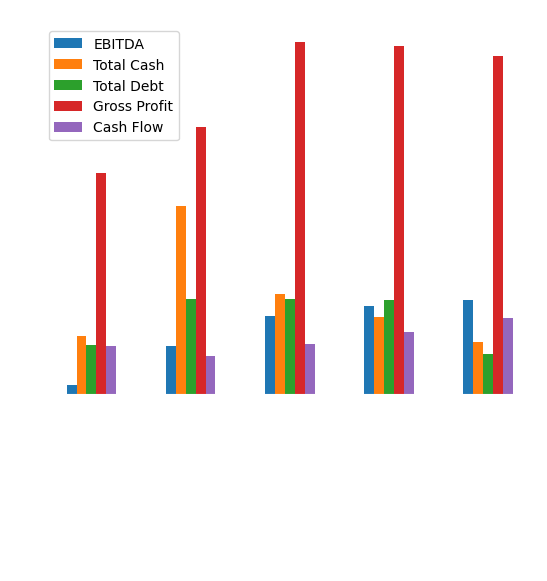

## Gamestop Stock Statistics

In [334]:
stat_query_url = url + '/stats?token=' + token
print(requests.get(stat_query_url))

<Response [200]>


In [409]:
response = requests.get(stat_query_url)
gme_stat = response.json()
gme_stats_df = pd.DataFrame([gme_stat]).set_index('companyName').drop(columns=['float', 'employees', 'ttmDividendRate',
                                                                              'dividendYield','nextDividendDate', 'exDividendDate',
                                                                              'nextEarningsDate'])
gme_stats_df

marketcap  week52high  week52low  week52change  \
companyName                                                              
Gamestop Corporation  22667762000      347.51        2.8     83.635417   

                      sharesOutstanding  avg10Volume  avg30Volume  \
companyName                                                         
Gamestop Corporation           69746960    116211171     66441953   

                      day200MovingAvg  day50MovingAvg  ttmEPS  ...  \
companyName                                                    ...   
Gamestop Corporation            19.75           54.31   -4.23  ...   

                      maxChangePercent  year5ChangePercent  \
companyName                                                  
Gamestop Corporation         34.267053           15.066759   

                      year2ChangePercent  year1ChangePercent  \
companyName                                                    
Gamestop Corporation            28.78973           77.692494   

                      ytdChangePercent  month6ChangePercent  \
companyName                                                   
Gamestop Corporation         16.250531            79.049261   

                      month3ChangePercent  month1ChangePercent  \
companyName                                                      
Gamestop Corporation            26.706735            15.769866   

                      day30ChangePercent  day5ChangePercent  
companyName                                                  
Gamestop Corporation           15.874351           3.999231  

[1 rows x 22 columns]

## Gamestop Largest Trades

In [410]:
trade_query_url = url + '/largest-trades?token=' + token
print(requests.get(trade_query_url))

<Response [200]>


In [411]:
response = requests.get(trade_query_url)
gme_trade = response.json()
pd.DataFrame(gme_trade)

Empty DataFrame
Columns: []
Index: []

## GameStop Halt

In [294]:
halt_query_url = 'https://cloud.iexapis.com/stable/stats/op-halt-status?symbols=GME&token=' + token
print(requests.get(halt_query_url))

<Response [200]>


In [295]:
response = requests.get(halt_query_url)
gme_halt = response.json()
pd.DataFrame(gme_halt)

GME
isHalted           False
timestamp  1611923102528